## Importing modules

In [57]:
!git clone https://github.com/maririn312/resnet_car_model_detection.git /content/resnet_car_model_detection


Cloning into '/content/resnet_car_model_detection'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 47 (delta 9), reused 43 (delta 8), pack-reused 0
Receiving objects: 100% (47/47), 99.62 KiB | 5.86 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [59]:
from tensorflow.keras.layers import Flatten,Input,Lambda,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [60]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

### using imagenet weights

In [61]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [62]:
for layer in resnet.layers:
    layer.trainable = False

In [63]:
folders = glob('/content/resnet_car_model_detection/Datasets/train/*')

In [64]:
x = Flatten()(resnet.output)

In [65]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [66]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [67]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [69]:
# Make sure you provide the same target size as initialied for the image size
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = train_datagen.flow_from_directory('/content/resnet_car_model_detection/Datasets/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')


Found 8 images belonging to 8 classes.


In [70]:
test_set = test_datagen.flow_from_directory('/content/resnet_car_model_detection/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8 images belonging to 8 classes.


In [71]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-71-070b10e8c207>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 2.4721 - accuracy: 0.1250 - val_loss: 8.1004 - val_accuracy: 0.1250
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 8.0565 - accuracy: 0.2500 - val_loss: 12.6753 - val_accuracy: 0.1250
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 13.1642 - accuracy: 0.1250 - val_loss: 9.4807 - val_accuracy: 0.1250
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 9.5682 - accuracy: 0.1250 - val_loss: 11.0049 - val_accuracy: 0.1250
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 10.9410 - accuracy: 0.1250 - val_loss: 11.4389 - val_accuracy: 0.1250
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 11.5152 - accuracy: 0.1250 - val_loss: 14.0634 - val_accuracy: 0.1250
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 14.3369 - accuracy: 0.1250 - val_loss: 16.8174 - val_accuracy: 0.1250
Epoch 8/50
1/1 [================

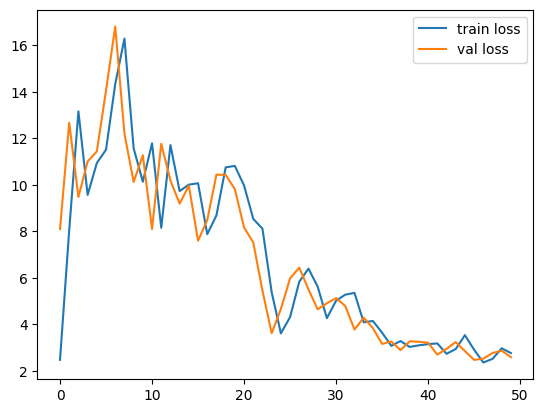

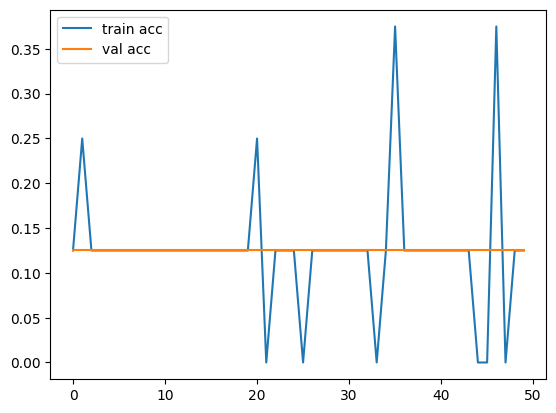

<Figure size 640x480 with 0 Axes>

In [72]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [73]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
y_pred = model.predict(test_set)
y_pred


1/1 [==============================] - 4s 4s/step


array([[0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011577, 0.29771778, 0.23678929, 0.07960714, 0.00277153,
        0.1438478 , 0.06267438, 0.06647633],
       [0.11011575, 0.29771772, 0.23678924, 0.07960713, 0.00277152,
        0.14384776, 0.06267449, 0.06647645],
       [0.11011554, 0.29771772, 0.2367897 , 0.07960713, 0.00277153,
        0.14384748, 0.06267449, 0.06647645]], dtype=float32)

In [75]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [77]:
img=image.load_img(r'/content/resnet_car_model_detection/Datasets/test/volkswagen/volkswagen_3.png',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [78]:
x.shape
x=x/255

In [79]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [80]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.10134173, 0.00423492, 0.2636176 , 0.05454868, 0.03035463,
        0.4261445 , 0.06415249, 0.05560546]], dtype=float32)

In [81]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 214ms/step


array([5])